Archivo cargado con éxito:
       Fecha    Importe  Cantidad  No de tickets
0 2024-10-03   16810.00         1              1
1 2024-10-04  225000.00        18             15
2 2024-10-05  469655.17        31             27
3 2024-10-06  486360.00        33             27
4 2024-10-07  112046.00         9              7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          43 non-null     datetime64[ns]
 1   Importe        43 non-null     float64       
 2   Cantidad       43 non-null     int64         
 3   No de tickets  43 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.5 KB
None
Fecha            0
Importe          0
Cantidad         0
No de tickets    0
dtype: int64
                     Fecha        Importe   Cantidad  No de tickets
count                   43      43.00000

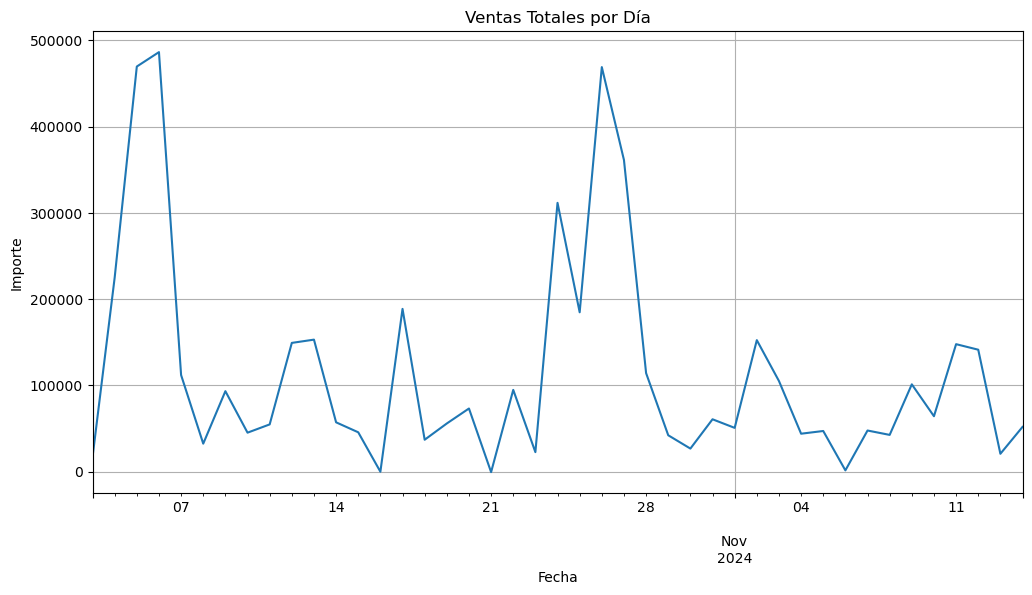

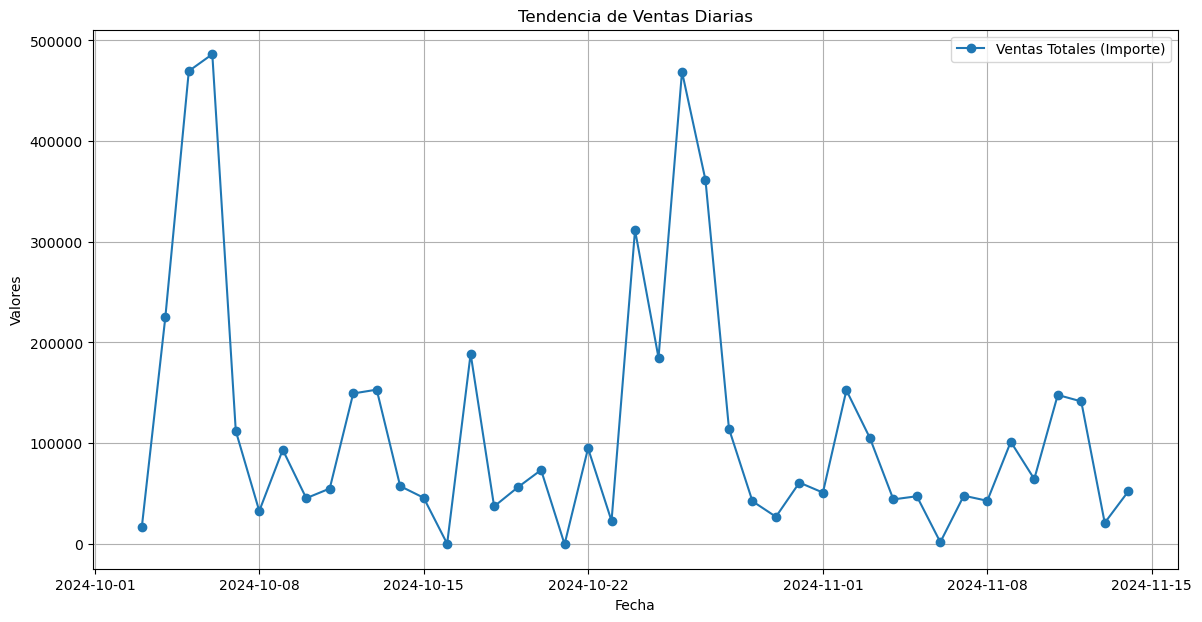

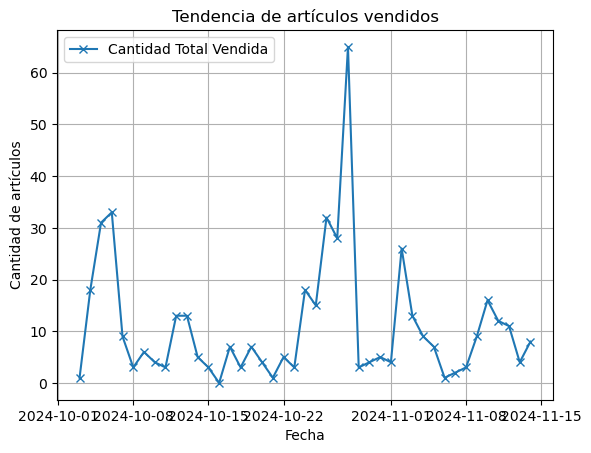

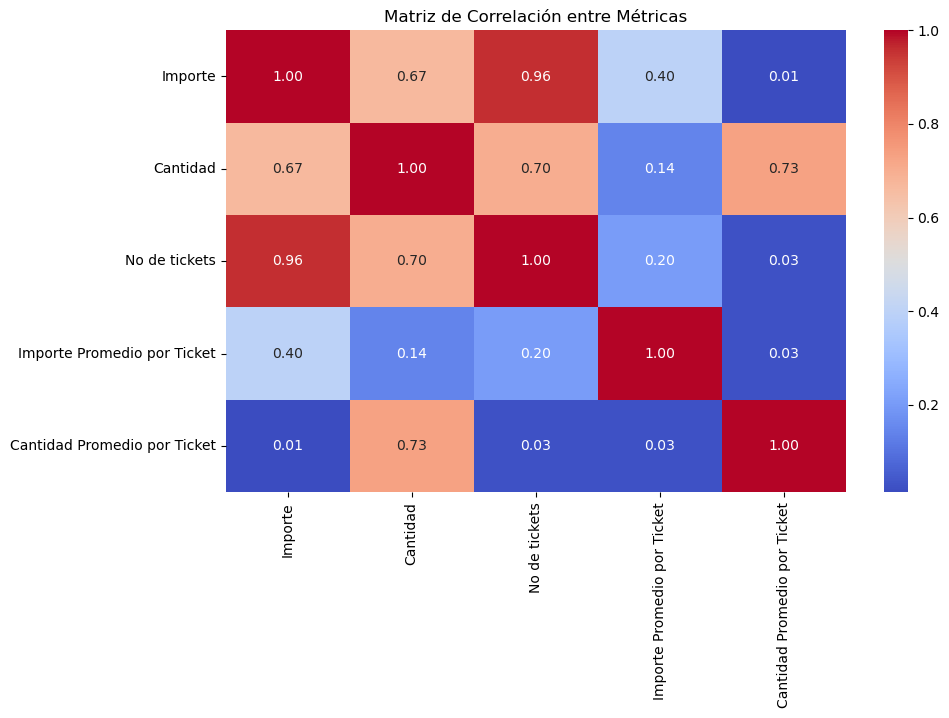

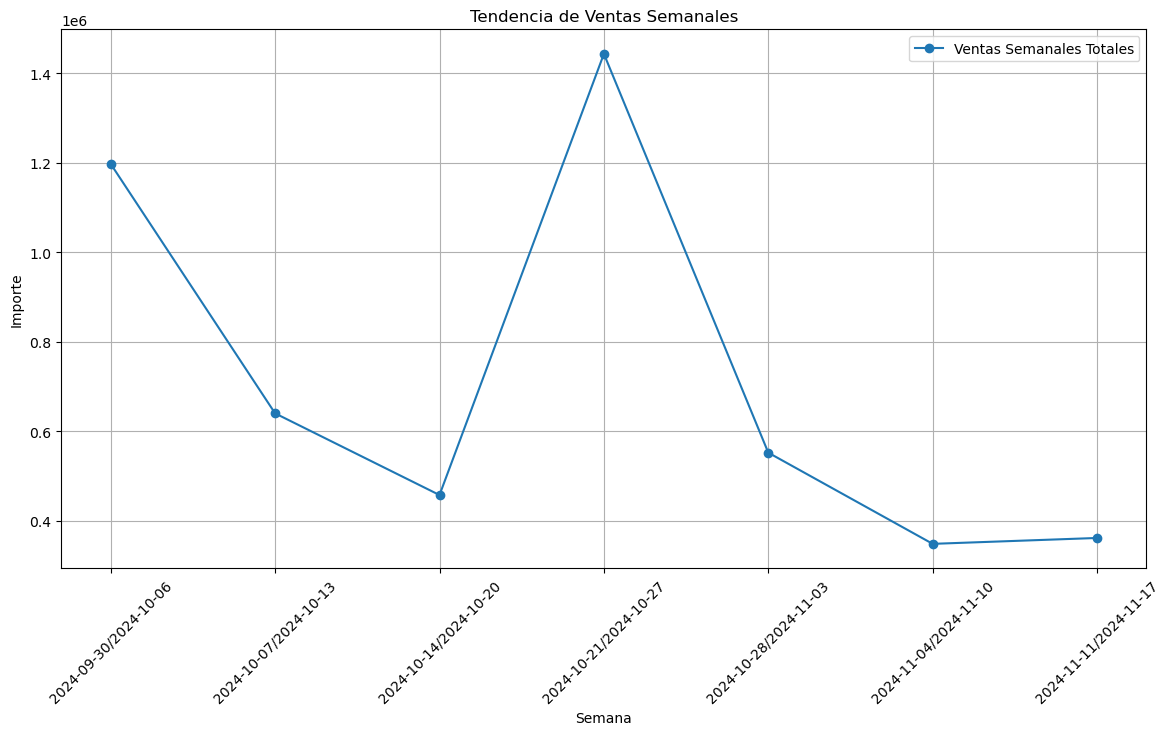

Error Absoluto Medio (MAE): $32192.07

Predicciones de ventas para el próximo mes:
        Fecha  Predicción de Ventas
0  2024-11-01            80560.5453
1  2024-11-02            80560.5453
2  2024-11-03            80560.5453
3  2024-11-04            78048.9397
4  2024-11-05            78143.3365
5  2024-11-06            78143.3365
6  2024-11-07            77781.3774
7  2024-11-08            82873.7779
8  2024-11-09            82341.9720
9  2024-11-10            83014.9599
10 2024-11-11            85074.3267
11 2024-11-12            98927.9923
12 2024-11-13            98835.2791
13 2024-11-14            97255.3084
14 2024-11-15            99621.1914
15 2024-11-16           110721.2944
16 2024-11-17           110598.8396
17 2024-11-18           110812.1241
18 2024-11-19            95008.2370
19 2024-11-20            96406.3970
20 2024-11-21            99249.3475
21 2024-11-22            99464.8589
22 2024-11-23           100032.2596
23 2024-11-24           100032.2596
24 2024-11-25    

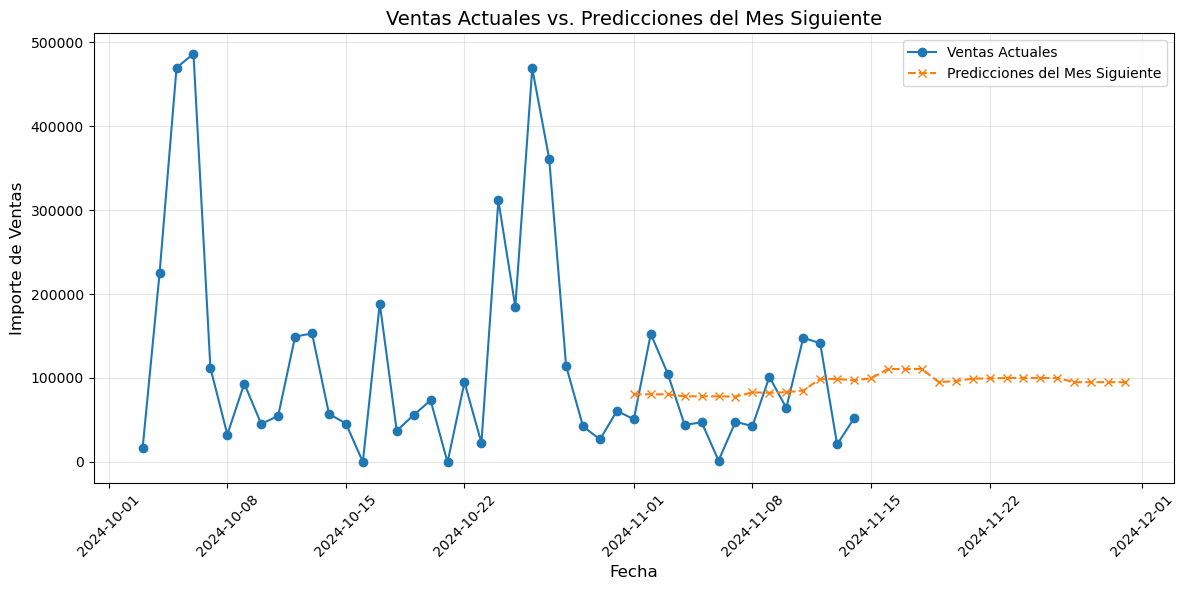

In [7]:
#Carga y exploración de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Cargar el archivo excel y visualizar que es correcto
archivo_excel = r"C:\Users\Usuario\Downloads\PROYECTO_CD\VENTAS_LEON.xlsx"

try:
    df = pd.read_excel(archivo_excel)
    print("Archivo cargado con éxito:")
    print(df.head())  # Mostrar las primeras filas
except FileNotFoundError:
    print(f"El archivo no se encontró en la ruta especificada: {archivo_excel}")
except Exception as e:
    print(f"Ocurrió un error: {e}")

#Visualizar las primeras filas
df = pd.read_excel(archivo_excel)

#Verificar si hay datos faltantes y revisar los tipos de datos
print(df.info())
print(df.isnull().sum())

#Si hay datos faltantes:
df.dropna(inplace=True)

#Convertir las columnas a los formatos correctos:
df['Fecha'] = pd.to_datetime(df['Fecha'])  # Convertir a fecha
df['Importe'] = pd.to_numeric(df['Importe'], errors='coerce')
df['Cantidad'] = pd.to_numeric(df['Cantidad'], errors='coerce')
df['No de tickets'] = pd.to_numeric(df['No de tickets'], errors='coerce')

#Análisis exploratorio básico
#Estadísticas descriptivas:
print(df.describe())

#Visualización básica de las ventas totales por día:
df.groupby('Fecha')['Importe'].sum().plot(kind='line', figsize=(12, 6), title="Ventas Totales por Día")
plt.ylabel("Importe")
plt.grid()
plt.show()

#Análisis de métricas clave
#Agrupar por fecha y calcular métricas:

ventas_diarias = df.groupby('Fecha').agg({
    'Importe': 'sum',  # Suma de ventas
    'Cantidad': 'sum',  # Suma de cantidad vendida
    'No de tickets': 'sum'  # Total de tickets emitidos
}).reset_index()

#Visualización de las métricas
plt.figure(figsize=(14, 7))
plt.plot(ventas_diarias['Fecha'], ventas_diarias['Importe'], label='Ventas Totales (Importe)', marker='o')
#plt.plot(ventas_diarias['Fecha'], ventas_diarias['Cantidad'], label='Cantidad Total Vendida', marker='x')
plt.title("Tendencia de Ventas Diarias")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.grid()
plt.show()

# Calcular promedios
ventas_diarias['Importe Promedio por Ticket'] = ventas_diarias['Importe'] / ventas_diarias['No de tickets']
ventas_diarias['Cantidad Promedio por Ticket'] = ventas_diarias['Cantidad'] / ventas_diarias['No de tickets']

#Visualización gráfica
plt.plot(ventas_diarias['Fecha'], ventas_diarias['Cantidad'], label='Cantidad Total Vendida', marker='x')
plt.title("Tendencia de artículos vendidos")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de artículos")
plt.legend()
plt.grid()
plt.show()

#Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(ventas_diarias[['Importe', 'Cantidad', 'No de tickets', 
                            'Importe Promedio por Ticket', 'Cantidad Promedio por Ticket']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")

#Este método de Seaborn se utiliza para crear el mapa de calor.
plt.title("Matriz de Correlación entre Métricas")
plt.show()

#Analisis semanal o mensual
ventas_diarias['Semana'] = ventas_diarias['Fecha'].dt.to_period('W').astype(str)
ventas_semanales = ventas_diarias.groupby('Semana').agg({
    'Importe': 'sum',
    'Cantidad': 'sum',
    'No de tickets': 'sum'
}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(ventas_semanales['Semana'], ventas_semanales['Importe'], label='Ventas Semanales Totales', marker='o')
plt.xticks(rotation=45)
plt.title("Tendencia de Ventas Semanales")
plt.xlabel("Semana")
plt.ylabel("Importe")
plt.legend()
plt.grid()
plt.show()

#PREDICCIÓN DE VENTAS DEL SIGUIENTE MES CON RANDOM FOREST
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from datetime import datetime, timedelta

# Ruta al archivo Excel
archivo = r"C:\Users\Usuario\Downloads\PROYECTO_CD\VENTAS_LEON.xlsx"  # Cambia esta ruta por la correcta
df = pd.read_excel(archivo)

# Asegurarse de que la columna 'Fecha' sea de tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Crear características temporales a partir de la fecha
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day

# Seleccionar características y variable objetivo
X = df[['Año', 'Mes', 'Día', 'Cantidad', 'No de tickets']]
y = df['Importe']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): ${mae:.2f}")

# Generar predicciones para el mes siguiente
fecha_actual = df['Fecha'].max()  # Última fecha en los datos
primer_dia_siguiente_mes = (fecha_actual + timedelta(days=1)).replace(day=1)
ultimo_dia_siguiente_mes = (primer_dia_siguiente_mes + timedelta(days=32)).replace(day=1) - timedelta(days=1)

# Crear un rango de fechas para el próximo mes
fechas_mes_siguiente = pd.date_range(start=primer_dia_siguiente_mes, end=ultimo_dia_siguiente_mes)

# Suponer valores promedio para Cantidad y No. de Tickets
cantidad_promedio = df['Cantidad'].mean()
tickets_promedio = df['No de tickets'].mean()

# Crear un DataFrame para las predicciones
datos_mes_siguiente = pd.DataFrame({
    'Año': [fecha.year for fecha in fechas_mes_siguiente],
    'Mes': [fecha.month for fecha in fechas_mes_siguiente],
    'Día': [fecha.day for fecha in fechas_mes_siguiente],
    'Cantidad': cantidad_promedio,
    'No de tickets': tickets_promedio
})

# Realizar las predicciones
predicciones = modelo_rf.predict(datos_mes_siguiente)

# Agregar predicciones al DataFrame
datos_mes_siguiente['Fecha'] = fechas_mes_siguiente
datos_mes_siguiente['Predicción de Ventas'] = predicciones

# Mostrar las predicciones
print("\nPredicciones de ventas para el próximo mes:")
print(datos_mes_siguiente[['Fecha', 'Predicción de Ventas']])

# Guardar predicciones en un archivo Excel
output_file = r"C:\Users\Usuario\Downloads\predicciones_mes_siguiente.xlsx"
datos_mes_siguiente.to_excel(output_file, index=False)
print(f"\nPredicciones guardadas en: {output_file}")

# Datos de ventas actuales
ventas_agrupadas = df.groupby(df['Fecha'].dt.to_period('D'))['Importe'].sum()
ventas_agrupadas.index = ventas_agrupadas.index.to_timestamp()  # Convertir a formato timestamp para graficar

# Datos del mes siguiente (predicciones)
predicciones_agrupadas = datos_mes_siguiente[['Fecha', 'Predicción de Ventas']]

# Crear la figura
plt.figure(figsize=(12, 6))

# Graficar ventas actuales
plt.plot(ventas_agrupadas.index, ventas_agrupadas, label="Ventas Actuales", marker='o')

# Graficar predicciones para el próximo mes
plt.plot(predicciones_agrupadas['Fecha'], predicciones_agrupadas['Predicción de Ventas'], 
         label="Predicciones del Mes Siguiente", marker='x', linestyle='--')

# Configurar etiquetas y título
plt.title("Ventas Actuales vs. Predicciones del Mes Siguiente", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Importe de Ventas", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
